In [ ]:
# Main requirements 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from tensorflow.keras import models, layers 
import cv2
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers

from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
#from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from tensorflow.keras.applications import VGG16
#K.set_image_dim_ordering('th')

BEG FUNTION DEF

In [ ]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img

#Reshape

In [ ]:
def myModel():
    # Hyperparameter selection                                                                                                                                                                                                                   
    # Filters of the CNN                                                                                                                                                                                                         
    no_Of_Filters=60                                                                                                                                                                                                             
    # Shape of the filters used in the CNN                                                                                                                                                                                       
    size_of_Filter=(5,5)                                                                                                                                                                                                         
    size_of_Filter2=(3,3)                                                                                                                                                                                                        
    # Tekes batches of 2x2 pixels and avg the                                                                                                                                                                                    
    size_of_pool=(2,2)                                                                                                                                                                                                           
    # Nodes of the neural classifier                                                                                                                                                                                             
    no_Of_Nodes = 500                                                                                                                                                                                                            
                                                                                                                                                                                                                                 
    # TODO: Add layers as presented in the class to conform your CNN 
    model = Sequential()                                                                                                                                                                                                                             
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))                                                                                                                                                              
    model.compile(optimizer=tf.keras.optimizers.RMSprop(),                                                                                                                                                                       
              loss=tf.keras.losses.BinaryCrossentropy(),                                                                                                                                                                         
              metrics=[tf.keras.metrics.BinaryAccuracy(),                                                                                                                                                                        
                       tf.keras.metrics.FalseNegatives()])                                                                                                                                                                       
                                                                                                                                                                                                                                 
    return model                                                                                                                                                                                                                 



END FUNTION DEF


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
################# Parameters #####################
tf.config.set_visible_devices([], 'GPU')

path = "drive/Shareddrives/TE3002B/AI_in_ROS/MyData" # folder with all the class folders
labelFile = 'drive/Shareddrives/TE3002B/AI_in_ROS/labels.csv' # file with all names of classes
batch_size_val=50  # how many to process together before updating the interanl parameters
steps_per_epoch_val=100 # we divide all our database in 10 bathces 
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.2    # if 1000 images split will 200 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for validation
###################################################

In [ ]:
############################### Importing of the Images
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")

#Import names
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print("{0} of {1}".format(count, len(myList)), end ="\n")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43
Importing Classes.....
0 of 43
1 of 43
2 of 43
3 of 43
4 of 43
5 of 43
6 of 43
7 of 43
8 of 43
9 of 43
10 of 43
11 of 43
12 of 43
13 of 43
14 of 43
15 of 43
16 of 43
17 of 43
18 of 43
19 of 43
20 of 43
21 of 43
22 of 43
23 of 43
24 of 43
25 of 43
26 of 43
27 of 43
28 of 43
29 of 43
30 of 43
31 of 43
32 of 43
33 of 43
34 of 43
35 of 43
36 of 43
37 of 43
38 of 43
39 of 43
40 of 43
41 of 43
42 of 43
 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
############################### Split Data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
 
# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

In [ ]:
############################### READ CSV FILE
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

###################################################3LF
print(len(X_train))
print(len(X_test))
#print(len(label_file), label_file.shape)
#print(label_file[:10])
#####
H,W=data.shape
print(H,W)
#data = data.reshape((17076, 55 * 57 *3))
#data = data.astype('float32') / 255)


data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>
17076
5337
43 2


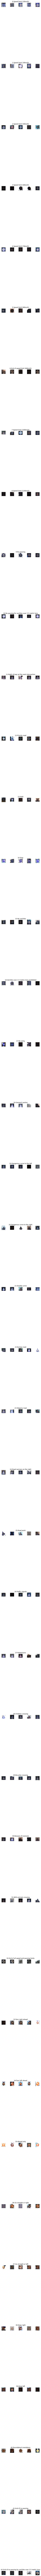

In [ ]:
############################### DISPLAY SOME SAMPLES IMAGES  OF ALL THE CLASSES
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1)], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

[97, 991, 1002, 617, 811, 777, 196, 623, 634, 617, 865, 572, 871, 937, 355, 253, 195, 481, 493, 103, 154, 148, 177, 236, 117, 671, 269, 119, 223, 107, 216, 335, 114, 294, 209, 531, 167, 95, 897, 132, 148, 122, 105]


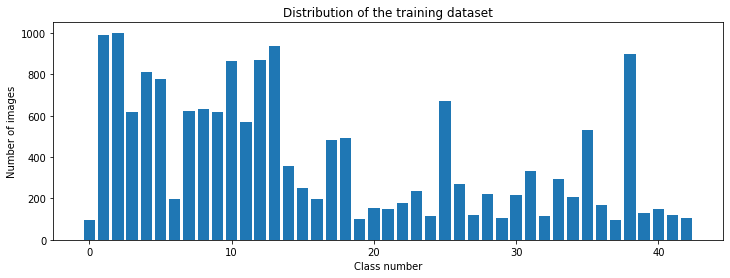

In [ ]:
############################### DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

In [ ]:
from tensorflow.core.framework.types_pb2 import DataType
############################### Split Data

 
# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

# TODO: Adapt the X_train, X_test, X_validation, y_train, y_test and y_validation arrays for the proper neural network training, validation and testing
#lf


print("Before")
print("Len X_train: ",len(X_train))
print("X_train[1]: ",X_train[1].shape)
#print("y_train[1]: ",y_train.shape)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

print("#####################################################")

X_trainp=[]
X_testp=[]
y_trainp=[]
y_testp=[]

print("#####################################################")

tipo=type(X_train[1])
tipo2=type(X_test[1])
print("Tipo1", tipo)
print("Tipo1", tipo2)



for i in range(len(X_train)):
  img=X_train[i]
  label=y_train[i]
  if tipo== type(img):
    imagep=preprocessing(img)
    resized_image = cv2.resize(imagep, (32, 32))
    X_trainp.append(resized_image)
    y_trainp.append(label)

for i in range(len(X_test)):
  img2=X_test[i]
  label2=y_test[i]
  if tipo2== type(img2):
    imagep2=preprocessing(img2)
    resized_image2 = cv2.resize(imagep2, (32, 32))
    X_testp.append(resized_image2)
    y_testp.append(label2)

print("After")
print("X_trainp: ",len(X_trainp))
print("y_trainp: ",len(y_trainp))
print("X_testp: ",len(X_testp))
print("y_testp: ",len(y_testp))
print("Before")
print(type(X_trainp))
print(type(y_trainp))
print(type(X_testp))
print(type(y_testp))
print("After")
#############################################
train_images = np.array(X_trainp)
train_labels = np.array(y_trainp)
test_images  = np.array(X_testp)
test_labels  = np.array(y_testp)
###############################################
print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))


#####################################################################
###Reshape####
print("Len: ", len(train_images))
train_imagesLEN=len(train_images)
test_imagesLEN=len(test_images)
print("Len: ", len(test_images))

print("Before")
print(f'Train images shape: {train_images.shape}')
print(f'Train test images shape: {test_images.shape}')
#train_images = train_images.reshape((train_imagesLEN, 32 * 32))
print('After')
print(f'Train images shape: {train_images.shape}')

# turn values from 0-255 to 0-1
#train_images = train_images.astype('float32') / 255 

# same starndadization for the test images
#test_images = test_images.reshape((test_imagesLEN, 32 * 32)) 
#test_images = test_images.astype('float32') / 255
print(f'Test images shape: {test_images.shape}')

train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)
print(train_labels[1])




Before
Len X_train:  17076
X_train[1]:  (55, 49, 3)
X_train shape: (17076,)
y_train shape: (17076,)
X_test shape: (5337,)
y_test shape: (5337,)
#####################################################
#####################################################
Tipo1 <class 'numpy.ndarray'>
Tipo1 <class 'numpy.ndarray'>
After
X_trainp:  17053
y_trainp:  17053
X_testp:  5324
y_testp:  5324
Before
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
After
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Len:  17053
Len:  5324
Before
Train images shape: (17053, 32, 32)
Train test images shape: (5324, 32, 32)
After
Train images shape: (17053, 32, 32)
Test images shape: (5324, 32, 32)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
#############################################################################################3333

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', strides=1, activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), padding='same', strides=1, activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 4096)            

In [ ]:
"""
train_images = np.array(X_trainp)
train_labels = np.array(y_trainp)
test_images  = np.array(X_testp)
test_labels  = np.array(y_testp)
"""


model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
427/427 [==============================] - 35s 78ms/step - loss: 2.1270 - accuracy: 0.4273 - val_loss: 1.3623 - val_accuracy: 0.6151
Epoch 2/5
427/427 [==============================] - 32s 76ms/step - loss: 0.4925 - accuracy: 0.8521 - val_loss: 0.7492 - val_accuracy: 0.8068
Epoch 3/5
427/427 [==============================] - 32s 74ms/step - loss: 0.1956 - accuracy: 0.9433 - val_loss: 0.1833 - val_accuracy: 0.9466
Epoch 4/5
427/427 [==============================] - 31s 73ms/step - loss: 0.0936 - accuracy: 0.9722 - val_loss: 0.2384 - val_accuracy: 0.9317
Epoch 5/5
427/427 [==============================] - 33s 76ms/step - loss: 0.0507 - accuracy: 0.9847 - val_loss: 0.1394 - val_accuracy: 0.9569


In [ ]:
model.evaluate(test_images, test_labels)

167/167 [==============================] - 5s 29ms/step - loss: 0.1614 - accuracy: 0.9587


[0.1614229679107666, 0.9586777091026306]

17 17


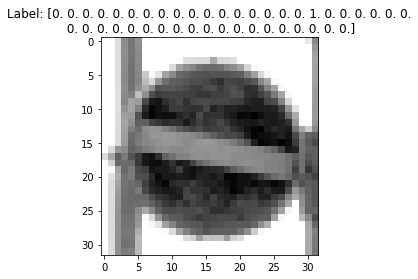

In [ ]:
test_index = 46

input_image = test_images[test_index]
prediction = model.predict(np.array([input_image]))

np.set_printoptions(precision=3, suppress= True)
print(np.argmax(prediction), np.argmax(test_labels[test_index]))

plt.title("Label: " + str(test_labels[test_index]))
plt.imshow(test_images[test_index].reshape(32,32), cmap='gray')

In [ ]:
# The keras.models.Sequential class is a wrapper for the neural network model that treats 
# the network as a sequence of layers
IMG_INPUT_SHAPE = (32,32,3)
convolutional =  VGG16(weights='imagenet', include_top = False, input_shape=IMG_INPUT_SHAPE)
convolutional.summary()


# Once we have our model built, we need to compile it before it can be run. 
# Compiling the Keras model calls the backend (tensorflow, theano, etc.) and binds the optimizer, 
# loss function, and other parameters required before the model can be run on any input data.

# loss function: basically, the error function. categorical crossentropy is one of many.


# optimizer: this is the mechanism through which the network will update itself.
# Stochastic Gradient descent (sgd) is one of those.

# Metrics to monitor during training and testing. Here we will only care about accuracy.


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
checkpoint = ModelCheckpoint(filepath="mnist_weights.hdf5", verbose=1, save_best_only=True)
model.fit(train_data, train_labels, epochs=5, validation_split=0.2, callbacks=[checkpoint])

NameError: ignored

In [ ]:
network.fit(train_images, train_labels, epochs=50)
#network.fit(train_images, train_labels, epochs=50,validation_split=0.2)

test_loss, test_acc = network.evaluate(test_images, test_labels)

print("test loss: ", test_loss, "test accuracy: ", test_acc)

In [ ]:
############################### TRAIN
# Create model structure
model = myModel()
print(model.summary())
# Train the model

# TODO: Modify the ImageDataGenerator attributes to improve your neural network performance if necessary
dataGen = ImageDataGenerator()

history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=batch_size_val),epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)
model.save('drive/MyDrive/AI_in_ROS/saved_model/my_model')


Results 




In [ ]:
############################### PLOT
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [ ]:
model = load_model('drive/MyDrive/AI_in_ROS/saved_model/my_model')

random_index = random.randint(0, len(images))
test_image = images[random_index]

test_image = preprocessing(test_image)
test_image = cv2.resize(test_image, (imageDimesions[0], imageDimesions[1]))
test_image = tf.expand_dims(test_image, axis=0)

test_image_class =classNo[random_index]

test_image_class_prediction = model.predict(test_image)

class_val = np.argmax(test_image_class_prediction[0], axis=0)

print("IMAGE CLASS: {0}".format(test_image_class))
print("IMAGE PREDICTION: {0}".format(class_val))

The following code can be used to test the model with your USB camera. You'll have to port it into ROS 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import cv2

tf.config.set_visible_devices([], 'GPU')
 
#############################################
 
frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.75         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX
##############################################
 
# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)

model = load_model('saved_model/my_model')
 
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
def getCalssName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'
     
while True:
 
    # READ IMAGE
    success, imgOrignal = cap.read()
         
    # PROCESS IMAGE
    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)

    img = img.reshape(1, 32, 32, 1)
    cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    # PREDICT IMAGE
    predictions = model.predict(img)
    classIndex = model.predict_classes(img)
    probabilityValue =np.amax(predictions)
    if probabilityValue > threshold:
       print(getCalssName(classIndex))
       cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
       cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
       cv2.imshow("Result", imgOrignal)
    else:
        print('Not found')
        cv2.putText(imgOrignal, 'No Traffic Sign', (120, 35), font, 0.75,
                    (0, 0, 255), 2, cv2.LINE_AA)

        cv2.imshow("Result", imgOrignal)
         
    if cv2.waitKey(1) and 0xFF == ord('q'):
       break

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('drive/MyDrive/AI_in_ROS/saved_model/my_model')
print(model.summary())
